In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from scipy.stats import linregress as lin
#import xuleta
#from scipy.stats import *
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [14]:
regiao = 'OP_Toledo'
#________________________
banco = 'dados/banco_diss.h5'
ndvi_ = pd.read_hdf(banco,'ivs/micro/ndvi')
ndi7_ = pd.read_hdf(banco,'ivs/micro/ndi7')
evi_ = pd.read_hdf(banco,'ivs/micro/evi')
lswi_ = pd.read_hdf(banco,'ivs/micro/lswi')
lst_ = pd.read_hdf(banco,'lstagri/microday_ma')
#if len(lst_[regiao]) == len(iv[regiao]):
lst=lst_[regiao]; ndvi=ndvi_[regiao]; evi=evi_[regiao]; ndi7=ndi7_[regiao];lswi=lswi_[regiao]
lst=lst.fillna(lst.mean())
#fit = polyfit(x,y,1)
#fit_fn = poly1d(fit)
#slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
fitndvi = poly1d(polyfit(lst,ndvi,1))
r2_ndvi = (lin(lst, ndvi)[2])**2
fitndi7 = poly1d(polyfit(lst,ndi7,1))
r2_ndi7 = (lin(lst, ndi7)[2])**2
fitevi = poly1d(polyfit(lst,evi,1))
r2_evi = (lin(lst, evi)[2])**2
fitlswi = poly1d(polyfit(lst,lswi,1))
r2_lswi = (lin(lst, lswi)[2])**2

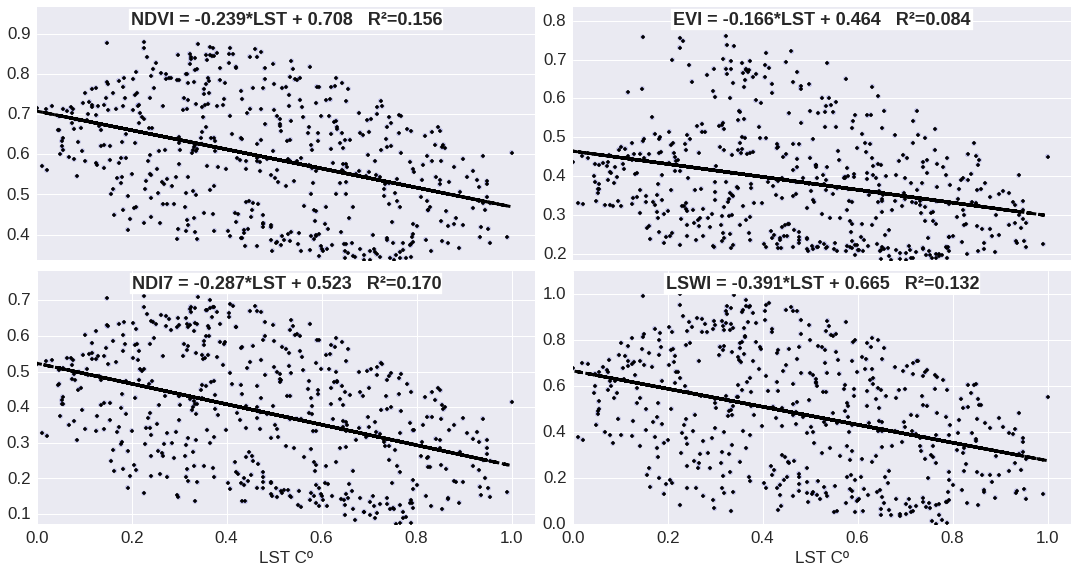

In [15]:
plt.figure(figsize=(15,8))
fs=17
plt.subplot(2,2,1)#NDVI
title = u'NDVI = %.3f*LST + %.3f   R²=%.3f' %(lin(lst, ndvi)[0],lin(lst, ndvi)[1], r2_ndvi)
plt.plot(lst,ndvi, 'k.', lst, fitndvi(lst), '--k', linewidth=3,  zorder=5)
plt.scatter(lst,ndvi, alpha=0.2)
plt.title(title,fontsize=18, fontweight='bold', backgroundcolor='w', y=0.91, zorder=10)
plt.ylim(ndvi.min(),1.1*ndvi.max())
plt.yticks(fontsize=fs)
#plt.xlabel(u'LST Cº',fontsize=fs)           
plt.xticks([])
plt.xlim(.95*lst.min(),1.05*lst.max())

plt.subplot(2,2,2)#EVI
title = u'EVI = %.3f*LST + %.3f   R²=%.3f' %(lin(lst, evi)[0],lin(lst, evi)[1], r2_evi)
plt.plot(lst,evi, 'k.', lst, fitevi(lst), '--k', linewidth=3,  zorder=5)
plt.scatter(lst,evi, alpha=0.2)
plt.title(title,fontsize=18, fontweight='bold', backgroundcolor='w', y=0.91, zorder=10)
plt.ylim(evi.min(),1.1*evi.max())
plt.yticks(fontsize=fs)
#plt.xlabel(u'LST Cº',fontsize=fs)           
plt.xticks([])
plt.xlim(.95*lst.min(),1.05*lst.max())

plt.subplot(2,2,3)#NDI7
title = u'NDI7 = %.3f*LST + %.3f   R²=%.3f' %(lin(lst, ndi7)[0],lin(lst, ndi7)[1], r2_ndi7)
plt.plot(lst,ndi7, 'k.', lst, fitndi7(lst), '--k', linewidth=3,  zorder=5)
plt.scatter(lst,ndi7, alpha=0.2)
plt.title(title,fontsize=18, fontweight='bold', backgroundcolor='w', y=0.91, zorder=10)
plt.ylim(ndi7.min(),1.1*ndi7.max())
plt.yticks(fontsize=fs)
plt.xlabel(u'LST Cº',fontsize=fs)           
plt.xticks(fontsize=fs)
plt.xlim(.95*lst.min(),1.05*lst.max())

plt.subplot(2,2,4)#LSWI
title = u'LSWI = %.3f*LST + %.3f   R²=%.3f' %(lin(lst, lswi)[0],lin(lst, lswi)[1], r2_lswi)
plt.plot(lst,lswi, 'k.', lst, fitlswi(lst), '--k', linewidth=3,  zorder=5)
plt.scatter(lst,lswi, alpha=0.2)
plt.title(title,fontsize=18, fontweight='bold', backgroundcolor='w', y=0.91, zorder=10)
plt.ylim(lswi.min(),1.1*lswi.max())
plt.yticks(fontsize=fs)
plt.xlabel(u'LST Cº',fontsize=fs)           
plt.xticks(fontsize=fs)
plt.xlim(.95*lst.min(),1.05*lst.max())

plt.tight_layout(pad=0.8)
#plt.savefig('/home/denis/Copy/DissDOCS/dissertation/Figures/Fivs_lst_regressions.pdf', format='pdf', bbox_iches='tight')
plt.show()

In [4]:
micros = ['COCP_CampoM', 'COCP_Goioere', 'NCP_Apucarana', 'NCP_Faxinal',
          'NCP_Florai','NCP_Ivaipora', 'NCP_Londrina', 'NCP_Maringa', 'NCP_Porecatu',
          'NP_Assai', 'NP_CornelioP','OP_Cascavel', 'OP_Foz', 'OP_Toledo']

In [16]:
regiao = 'OP_Cascavel'
lst=lst_[regiao]; ndvi=ndvi_[regiao]; evi=evi_[regiao]; ndi7=ndi7_[regiao];lswi=lswi_[regiao]
lst=lst.fillna(lst.mean())

In [23]:
f = open('dados/regs.txt','a')
f.write('iv,region,slope,intercept,rsquare \n');f.flush()
banco = 'dados/banco_diss.h5'
ndvi_ = pd.read_hdf(banco,'ivs/micro/ndvi')
ndi7_ = pd.read_hdf(banco,'ivs/micro/ndi7')
evi_ = pd.read_hdf(banco,'ivs/micro/evi')
lswi_ = pd.read_hdf(banco,'ivs/micro/lswi')
lst_ = pd.read_hdf(banco,'lstagri/microday_ma')
for regiao in micros:
    lst=lst_[regiao]; ndvi=ndvi_[regiao]; evi=evi_[regiao]; ndi7=ndi7_[regiao];lswi=lswi_[regiao]
    lst=lst.fillna(lst.mean())
    s_ndvi,i_ndvi,r_ndvi,p_ndvi,st_ndvi = stats.linregress(lst, ndvi)
    s_evi,i_evi,r_evi,p_evi,st_evi = stats.linregress(lst, evi)
    s_ndi7,i_ndi7,r_ndi7,p_ndi7,st_ndi7 = stats.linregress(lst, ndi7)
    s_lswi,i_lswi,r_lswi,p_lswi,st_lswi = stats.linregress(lst, lswi)

    indvi = 'ndvi,'+regiao+','+str(s_ndvi)+','+str(i_ndvi)+','+str(r_ndvi**2)+'\n'
    ievi = 'evi,'+regiao+','+str(s_evi)+','+str(i_evi)+','+str(r_evi**2)+'\n'
    indi7 = 'ndi7,'+regiao+','+str(s_ndi7)+','+str(i_ndi7)+','+str(r_ndi7**2)+'\n'
    ilswi = 'lswi,'+regiao+','+str(s_lswi)+','+str(i_lswi)+','+str(r_lswi**2)+'\n'
    f.write(indvi);f.write(ievi);f.write(indi7);f.write(ilswi)
    f.flush()

f.close()

In [19]:
regs = pd.read_csv('dados/regs.txt')
regs

,iv,region,slope,intercept,rsquare,stderr
0,ndvi,COCP_CampoM,0.983402,-0.012244,0.156370,NaN
1,ndi7,COCP_CampoM,0.849275,-0.014657,0.257436,NaN
2,lswi,COCP_CampoM,0.440262,-0.010296,0.132272,NaN
3,ndvi,COCP_Goioere,0.974755,-0.012146,0.156370,NaN
4,ndi7,COCP_Goioere,0.837870,-0.014415,0.198795,NaN
5,lswi,COCP_Goioere,0.411854,-0.009472,0.132272,NaN
6,ndvi,NCP_Apucarana,1.100192,-0.015971,0.156370,NaN
7,ndi7,NCP_Apucarana,1.006883,-0.019142,0.383429,NaN
8,lswi,NCP_Apucarana,0.576644,-0.014304,0.132272,NaN
9,ndvi,NCP_Faxinal,1.039753,-0.013582,0.156370,NaN


In [20]:
#regs.groupby(['iv']).mean().to_latex('dados/tabiv.txt')
regs.groupby(['region']).mean().to_latex('dados/tabregion.txt')

outra abordagem pra fitting
-------------------

In [51]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
regiao = 'NCP_Apucarana'
niv = 'lswi'
niv2 = 'ndvi'
#_____________________________
banco = 'dados/banco_diss.h5'
iv = pd.read_hdf(banco,'ivs/micro/' + niv)
iv2 = pd.read_hdf(banco,'ivs/micro/' + niv2)
lst = pd.read_hdf(banco,'lstagri/microday_ma')
if len(lst[regiao]) == len(iv[regiao]):
    x = lst[regiao]; y = iv[regiao]; z = iv2[regiao]
    x=x.fillna(x.mean())
data = pd.DataFrame([x,y,z]).T
data.columns = ['LST', niv,niv2]

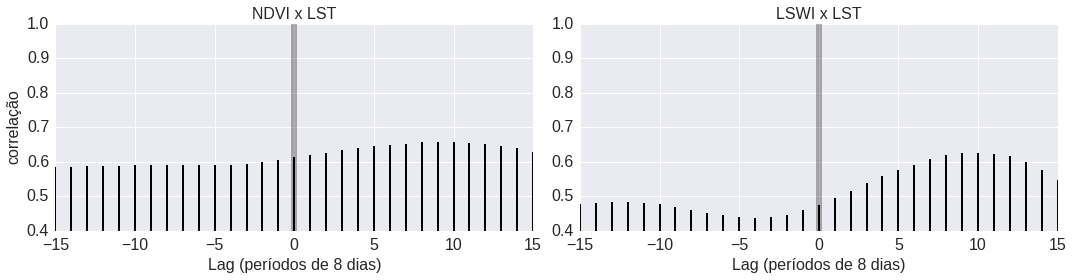

In [6]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.xcorr(data[niv2],data.LST,usevlines=True, maxlags=20, normed=True, lw=2)
plt.title('%s x LST' %niv2.upper(), fontsize=16)
plt.axvline(x=0, alpha=0.3, color='k',linewidth=6)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.xlabel(u'Lag (períodos de 8 dias)',fontsize=16)  
plt.ylabel(u'correlação', fontsize=16)
plt.xlim(-15,15)
plt.ylim(0.4,1)

plt.subplot(1,2,2)
plt.xcorr(data[niv],data.LST,usevlines=True, maxlags=20, normed=True, lw=2)
plt.title('%s x LST' %niv.upper(), fontsize=16)
plt.axvline(x=0, alpha=0.3, color='k',linewidth=6)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.xlabel(u'Lag (períodos de 8 dias)',fontsize=16)  
#plt.ylabel(u'correlação', fontsize=16)
plt.xlim(-15,15)
plt.ylim(0.4,1)

plt.tight_layout()
#plt.savefig('/home/denis/Copy/DissDOCS/dissertation/Figures/Fcross_corr.pdf', format='pdf')
plt.show()

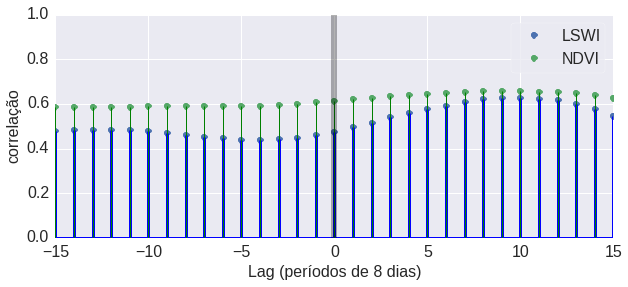

In [8]:
plt.figure(figsize=(10,4),dpi=300)
plt.xcorr(data[niv],data.LST,usevlines=False, maxlags=20, normed=True, lw=2, label='LSWI')
plt.xcorr(data[niv2],data.LST,usevlines=False, maxlags=20, normed=True, lw=2,label='NDVI')
plt.xcorr(data[niv],data.LST,usevlines=True, maxlags=20, normed=True, lw=3,color='b',zorder=3)
plt.xcorr(data[niv2],data.LST,usevlines=True, maxlags=20, normed=True, lw=1,color='g',zorder=5)
plt.axvline(x=0, alpha=0.3, color='k',linewidth=6,zorder=7)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
plt.xlabel(u'Lag (períodos de 8 dias)',fontsize=16)  
plt.ylabel(u'correlação', fontsize=16)
plt.xlim(-15,15)
plt.ylim(0.0,1)
plt.legend(loc='best', fontsize=16,fancybox=True, framealpha=0.8,frameon=True,shadow=False)
#plt.savefig('/home/denis/Copy/DissDOCS/dissertation/Figures/Fcross_corr.pdf', bbox_inches='tight',format='pdf')
plt.show()

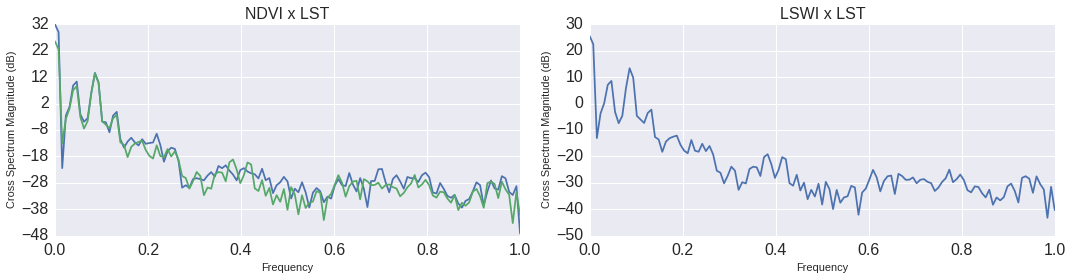

In [164]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.csd(data[niv2],data.LST)#,usevlines=True, maxlags=20, normed=True, lw=2)
plt.csd(data[niv],data.LST)
plt.title('%s x LST' %niv2.upper(), fontsize=16)
#plt.axvline(x=0, alpha=0.3, color='k',linewidth=6)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
#plt.xlabel(u'Lag (períodos de 8 dias)',fontsize=16)  
#plt.ylabel(u'correlação', fontsize=16)
#plt.xlim(-15,15)
#plt.ylim(0.4,1)

plt.subplot(1,2,2)
plt.csd(data[niv],data.LST)#,usevlines=True, maxlags=20, normed=True, lw=2)
plt.title('%s x LST' %niv.upper(), fontsize=16)
#plt.axvline(x=0, alpha=0.3, color='k',linewidth=6)
plt.yticks(fontsize=16);plt.xticks(fontsize=16)
#plt.xlabel(u'Lag (períodos de 8 dias)',fontsize=16)  
#plt.ylabel(u'correlação', fontsize=16)
#plt.xlim(-15,15)
#plt.ylim(0.4,1)

plt.tight_layout()
#plt.savefig('/home/denis/Copy/DissDOCS/dissertation/Figures/Fcross_corr.pdf', format='pdf')
plt.show()

In [55]:
model = sm.ols(formula='%s ~ LST' %niv, data=data, subset=None)
fitted = model.fit()
print fitted.summary()

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     97.13
Date:                Sat, 07 Feb 2015   Prob (F-statistic):           3.91e-21
Time:                        15:38:04   Log-Likelihood:                 310.01
No. Observations:                 526   AIC:                            -616.0
Df Residuals:                     524   BIC:                            -607.5
Df Model:                           1                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9462      0.036     26.092      0.000         0.875     1.017
LST           -0.0111      0.001     -9.855      0.0

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(data['LST'],data[niv],'ro')
plt.plot(data['LST'], fitted.fittedvalues, 'b')
#plt.legend([niv, 'Fitted model'])
#plt.ylim(0, 1)
#plt.xlim(-2, 12)
plt.show()

In [ ]:
#Residuos normalizados
plt.hist(fitted.norm_resid())
plt.ylabel('Count')
plt.xlabel('Normalized residuals')
plt.show()

In [ ]:
#Cook's distance
influence = fitted.get_influence()
#c is the distance and p is p-value
(c, p) = influence.cooks_distance
plt.stem(np.arange(len(c)), c, markerfmt=",")

In [ ]:
import statsmodels.graphics
statsmodels.graphics.regressionplots.plot_leverage_resid2(fitted)
statsmodels.graphics.regressionplots.influence_plot(fitted)